In [21]:
# On importe les librairies dont on aura besoin pour ce travail
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt, cm as cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import linear_model

In [22]:
# Référence en y du plot
_ORDONNEE = "nutrition-score-fr_100g"

# Lieu où se trouve le FICHIER
_FICHIER = 'C:\\Users\\Toni\\Desktop\\pas_synchro\\bdd_clean.csv'

# Lieu de sauvegarde
_DOSSIERTRAVAIL = 'C:\\Users\\Toni\\python\\python\\Projet_2\\images'

Fonction qui permet de créer une visualisation du lien entre les variables 2 à 2

In [23]:
def correlation_matrix(data):
    """
        Fonction qui permet de créer une visualisation du lien entre les
        variables 2 à 2
    """
    # Calcule de la matrice
    corr = data.corr()
    cmap = cm.get_cmap('jet', 30)

    # Taille de la figure
    plt.figure(figsize=(10, 10))
    # Création du type d'image
    cax = plt.imshow(data.corr(), interpolation="nearest", cmap=cmap)
    plt.grid(True)

    # Libellés sur les axes
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=15)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=15)

    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    plt.colorbar(cax, ticks=[-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    plt.show()

Fonction qui permet d'effectuer une régression linéaire entre les variables 2 à 2, afin de chiffrer ce qu'on a vu dans la fonction de corrélation.

In [24]:
def regression_lineaire(data, colon1, colon2):
    """
        Fonction pour le calcul des régressions linéaires
    """

    # Calcul de la droite optimale
    regr = linear_model.LinearRegression()
    regr.fit(data[colon1].values.reshape(-1, 1), data[colon2].values.reshape(-1, 1))

    # Affichage de la variances : On doit être le plus proche possible de 1
    print('Regression sur les deux colonnes :', colon1, colon2)
    print('Score : %.2f' % np.corrcoef(data[colon1], data[colon2])[1, 0])

Fonction qui va permettre de définir la sanité (Sain/Pas sain) d'un aliment

In [25]:
def sanite(df, dico, nb_sain):
    """
        TBD
    """
        # Rajout d'une colonne qui est True/False si les aliments sont sains
    df['Aliment Sain'] = df['Qualite'].map(dico)

    # Visualisation via un camembert
    data_pie_1 = df['Aliment Sain'].where(df['Aliment Sain']).count()
    data_pie_2 = df['Aliment Sain'].where(df['Aliment Sain'] == False).count()
    data_pie = [data_pie_1, data_pie_2]
    plt.axis('equal')
    Titre = 'Répartition Aliment sain/Aliment pas sain pour nb_sain = %s ' % nb_sain
    plt.title(Titre)
    plt.pie(data_pie, labels=['Sain', 'Pas Sain'], shadow=True, explode=[0, 0.1], autopct='%1.1f%%')
    plt.show()

Création des histogrammes d'une seule variable

In [26]:
def histogramme(data, colon):
    """
        Note : La première colonne et la dernière ont un " caché
    """

    fichier_save = _DOSSIERTRAVAIL + '\\' + 'histogram_' + colon

    steps = (max(data[colon])-min(data[colon]))/100
    bin_values = np.arange(start=min(data[colon]), stop=max(data[colon]), step=steps)
    plt.figure(figsize=(10, 6))
    plt.xlabel('Valeurs')
    plt.ylabel('Décompte')
    titre = 'Histogramme ' + colon
    plt.title(titre)
    plt.hist(data[colon], bins=bin_values)
    plt.savefig(fichier_save, dpi=100)
    plt.show()

On entre dans le main

In [27]:
# On charge le dataset sur les colonnes qui nous ont intéressés dans la fonction du dessus
data = pd.read_csv(_FICHIER,
                   error_bad_lines=False,
                   engine='python',
                   sep=',')

# On supprime une colonne inutile
del data['Unnamed: 0']

In [28]:
# Transposition du dataframe de données pour l'abalyse univariée
fichier_save = _DOSSIERTRAVAIL + '\\' + 'transposition.csv'
data_transpose = data.describe().reset_index().transpose()
print (data_transpose)
data_transpose.to_csv(fichier_save)

                             0            1            2    3        4  \
index                    count         mean          std  min      25%   
energy_100g              97884       1125.1      715.392    0      418   
fat_100g                 97884      12.0408      12.8836    0     1.02   
saturated-fat_100g       97884      4.19928        5.503    0        0   
trans-fat_100g           97884  5.57854e-05   0.00257288    0        0   
cholesterol_100g         97884    0.0152528    0.0262212    0        0   
carbohydrates_100g       97884      33.7413      26.6005    0      8.8   
sugars_100g              97884      13.6941      16.5258    0     1.75   
fiber_100g               97884      2.35457      2.88288    0        0   
proteins_100g            97884      7.21299      6.59054    0      2.5   
salt_100g                97884     0.880556     0.809932    0  0.15494   
sodium_100g              97884     0.346676      0.31887    0    0.061   
vitamin-a_100g           97884  7.2222

TBD...

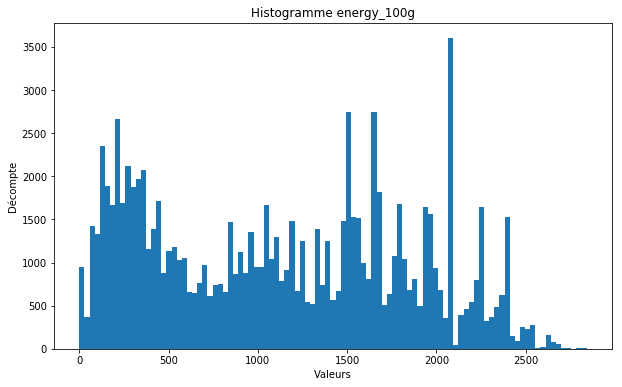

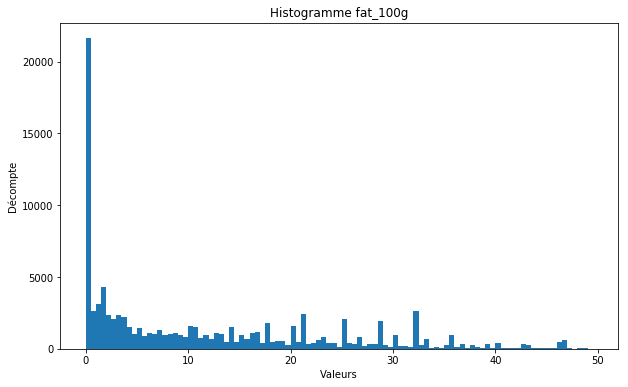

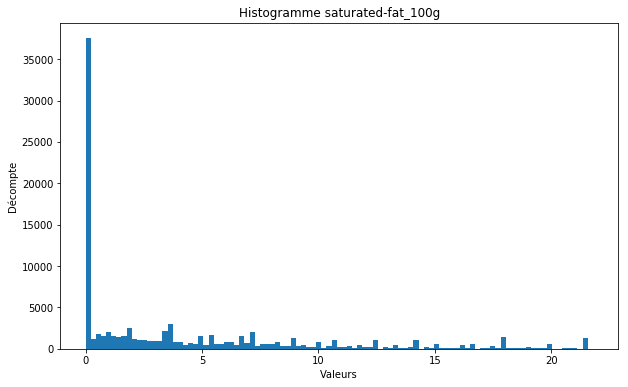

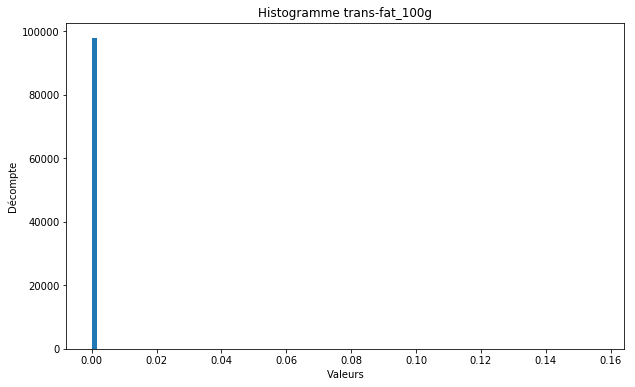

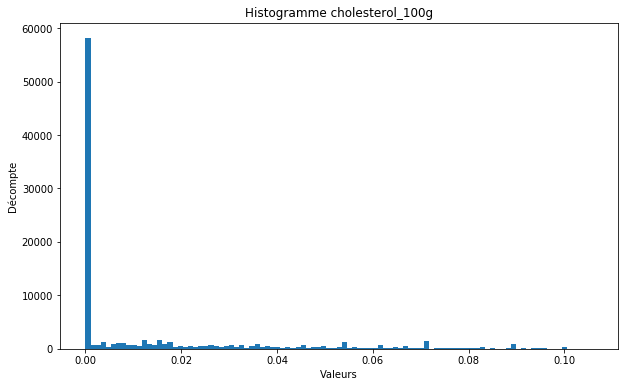

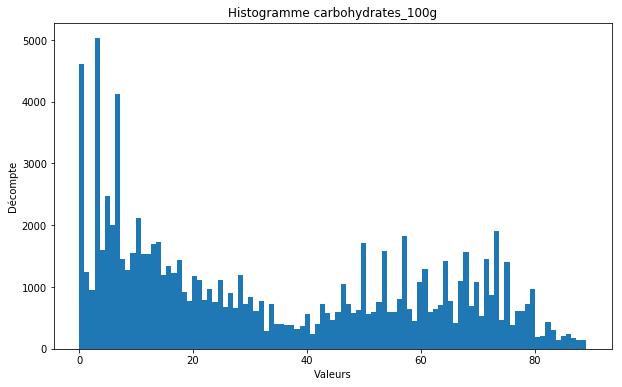

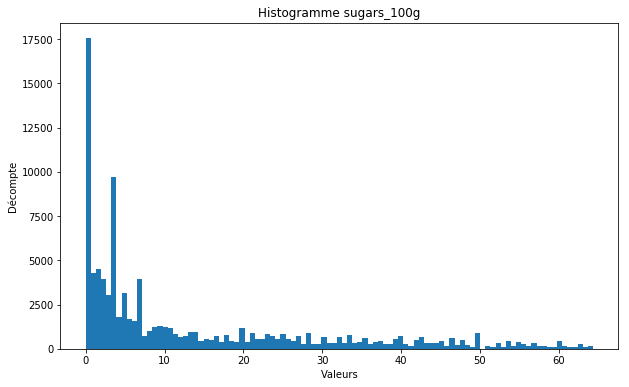

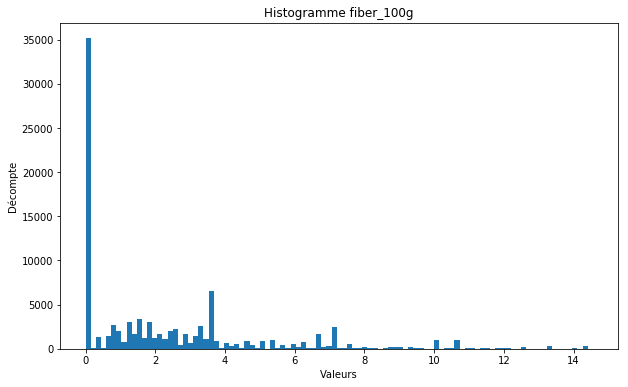

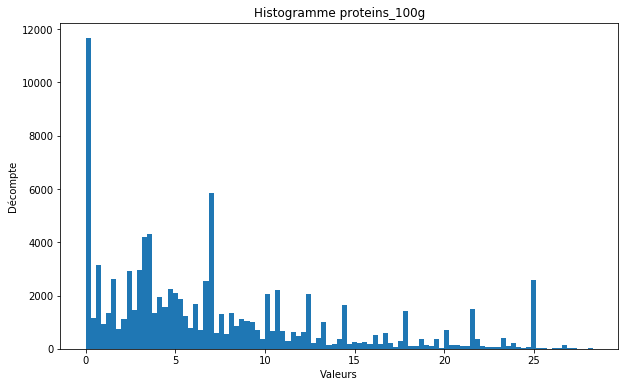

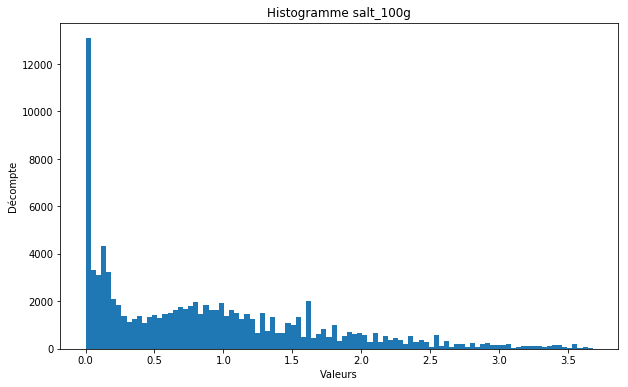

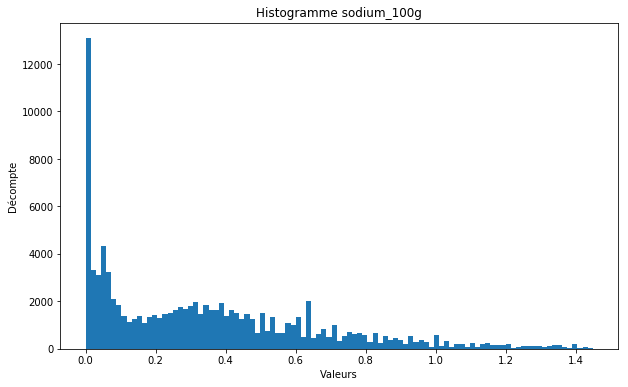

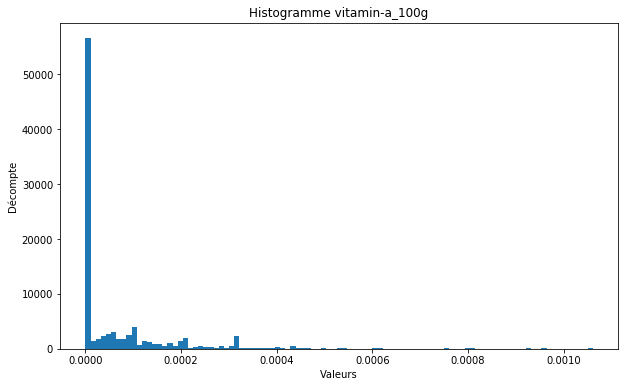

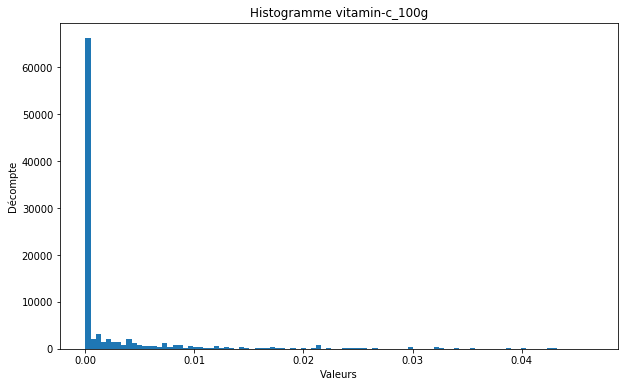

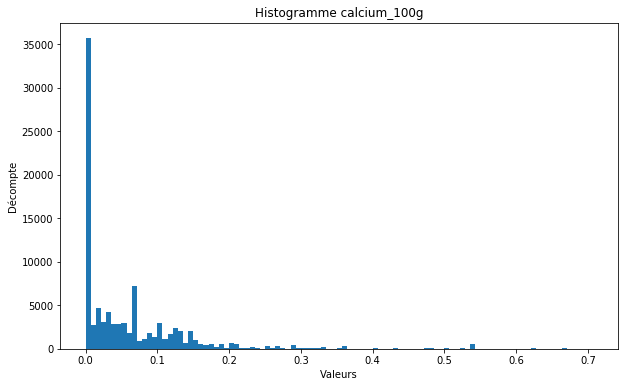

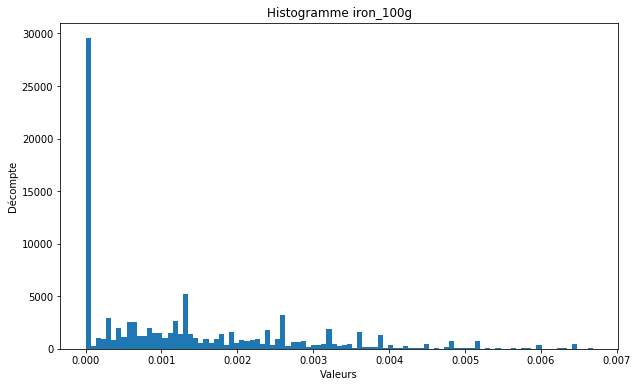

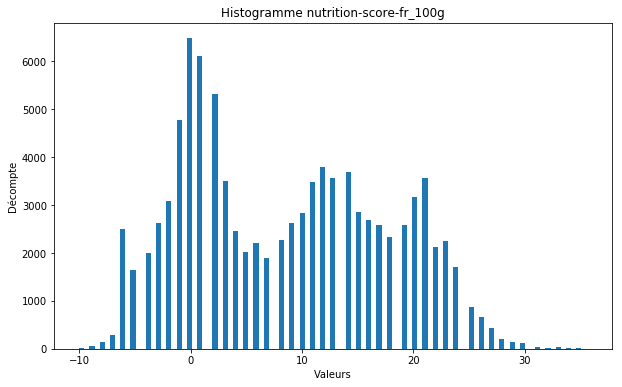

In [29]:
# Création des histogrammes
for colon in data:
    if colon != 'nutrition_grade_fr':
        histogramme(data, colon)

TBD...

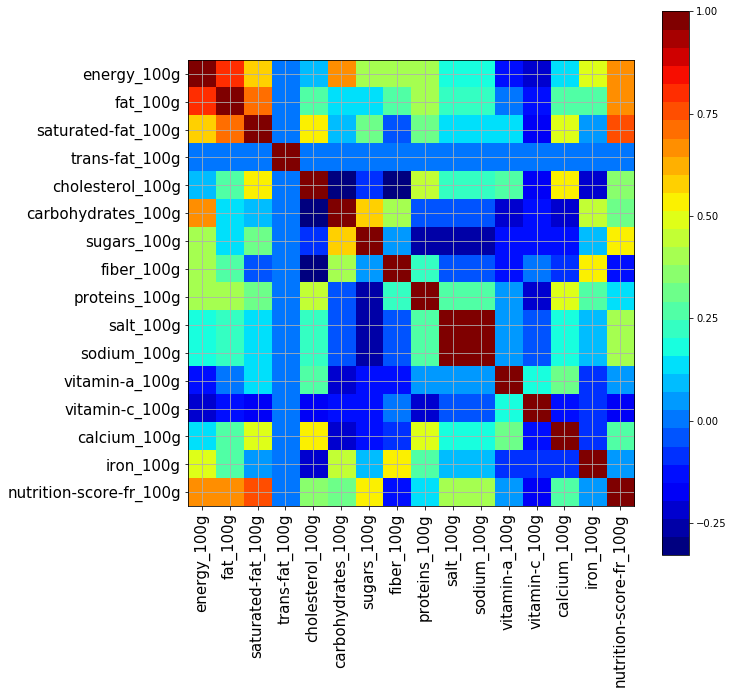

In [30]:
# Création du collérogramme
correlation_matrix(data)

Dans le corrélogramme, il ne faut pas prendre en compte la diagonale (supérieure gauche-inférieure droite) car elle « montre l’impact d’une variable sur elle-même ». Sa valeur sera toujours de 1.

Les conclusions essentielles à tirer de cette figure sont les suivantes :

__Sont très liées :__
* Les quantités d’énergie et de graisse.
* Les quantités de graisse et de graisses saturées.
* Les quantités de carbohydrates et d’énergie.

__Vont faire progresser positivement le score nutritionnel :__
* La quantité de vitamine A.
* La quantité de vitamine C.
* La quantité de fibres
* La quantité de protéines.

__Vont faire progresser négativement le score nutritionnel :__
* La quantité d’énergie
* La quantité de graisse.
* La quantité de sucre.
* La quantité de graisse saturée.

On va maintenant essayer de créer quelques variables afin de simplifier la lecture immédiate de certains résultats

In [31]:
# Création des régressions linéaires
for colon in data:
    if colon != 'nutrition_grade_fr' and colon != 'nutrition-score-fr_100g':
        regression_lineaire(data, 'nutrition-score-fr_100g', colon)

regression_lineaire(data, 'energy_100g', 'fat_100g')
regression_lineaire(data, 'energy_100g', 'fiber_100g')
regression_lineaire(data, 'fat_100g', 'saturated-fat_100g')
regression_lineaire(data, 'sugars_100g', 'salt_100g')
regression_lineaire(data, 'proteins_100g', 'calcium_100g')

Regression sur les deux colonnes : nutrition-score-fr_100g energy_100g
Score : 0.65
Regression sur les deux colonnes : nutrition-score-fr_100g fat_100g
Score : 0.66
Regression sur les deux colonnes : nutrition-score-fr_100g saturated-fat_100g
Score : 0.77
Regression sur les deux colonnes : nutrition-score-fr_100g trans-fat_100g
Score : -0.01
Regression sur les deux colonnes : nutrition-score-fr_100g cholesterol_100g
Score : 0.37
Regression sur les deux colonnes : nutrition-score-fr_100g carbohydrates_100g
Score : 0.31
Regression sur les deux colonnes : nutrition-score-fr_100g sugars_100g
Score : 0.55
Regression sur les deux colonnes : nutrition-score-fr_100g fiber_100g
Score : -0.13
Regression sur les deux colonnes : nutrition-score-fr_100g proteins_100g
Score : 0.14
Regression sur les deux colonnes : nutrition-score-fr_100g salt_100g
Score : 0.39
Regression sur les deux colonnes : nutrition-score-fr_100g sodium_100g
Score : 0.39
Regression sur les deux colonnes : nutrition-score-fr_10

In [32]:
# Variables tableaux qui vont être utilisées
results = []
res_a = []
res_b = []
res_c = []
res_d = []
res_e = []

# Taille de l'abscisse
array_x_plot = np.arange(10.0, 350.0, 2)

Dans les lignes ci-dessous, on arrange des nouvelles colonnes sur une base copiée, pour ne pas polluer l'originale

In [33]:
# Copy de la database initial pour ne pas travailler dessus directement
df = data.copy()

# Suppresion de la colonne non-chiffre
del df['nutrition_grade_fr']

# On va scaler les données pour les prochaines colonnes créées
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.values)
df2 = pd.DataFrame(x_scaled)

# On recopie les noms des colonnes
df2.columns = df.columns

# Calculs
# Somme des élments positifs
df2['Positif'] = df2['vitamin-a_100g']+df2['vitamin-c_100g']+df2['fiber_100g']+df2['proteins_100g']+df2['iron_100g']

# Somme des éléments négatifs
df2['Negatif'] = df2['sugars_100g']+df2['salt_100g']+df2['energy_100g']+df2['fat_100g']

# Différence du résultat
df2['Diff'] = (0.01+df2['Positif'])/(0.01+df2['Negatif'])

Dans la partie ci-dessous, nous allons essayer de "valider" les similitudes entre l'échelle créé ici et l'echelle du nutriscore. Nous allons rechercher une valeur "i" qui va maximiser le taux de similitude, sans toutefois chercher à l'atteindre.

Le but ici est uniquement de donner un aperçu ce qui pourrait être fait dans un futur projet

In [34]:
# de i=1 à i+200 avec i=i+1
for i in array_x_plot:

    # On fait une boucle pour faire les 3 à la suite
    nom_colonne = ['Positif', 'Negatif', 'Diff']
    choices = ['e', 'd', 'c', 'b', 'a']

    for colonne in nom_colonne:
        # Valeur max de la colonne
        value_max = df2[colonne].max()

        # On divise en 5 subsets
        conditions = [
            (df2[colonne] <= (1/i)*(value_max)),
            (df2[colonne] > (1/i)*(value_max)) & (df2[colonne] <= (2/i)*(value_max)),
            (df2[colonne] > (2/i)*(value_max)) & (df2[colonne] <= (3/i)*(value_max)),
            (df2[colonne] > (3/i)*(value_max)) & (df2[colonne] <= (4/i)*(value_max)),
            (df2[colonne] > (4/i)*(value_max))]

        # On rajoute la colonne avec la donnée
        colonne_cible = 'Indice' + colonne[0]
        df2[colonne_cible] = np.select(conditions, choices)

    # On recopie une colonne de l'autre dataset
    df['Qualite'] = df2['IndiceD']

    # Rajout de la colonne du nutri score en lettres
    df['nutrition_grade_fr'] = data['nutrition_grade_fr']

    # Rajout d'une colonne qui est True/False si les valeurs sont égales
    df['Verdict'] = df['Qualite'] == df['nutrition_grade_fr']

    # Nom de la colonne de référence
    ref = 'nutrition_grade_fr'

    # Calcul des scores
    score = 100 * df['Verdict'].where(df['Verdict']).count()/df['Verdict'].count()
    results.append(score)
    
    s_a = df['Qualite'].where(df['Qualite'] == 'a') == df[ref].where(df[ref] == 'a')
    s_a = 100 * s_a.where(s_a).count()/df[ref].where(df[ref] == 'a').count()
    res_a.append(s_a)

    s_b = df['Qualite'].where(df['Qualite'] == 'b') == df[ref].where(df[ref] == 'b')
    s_b = 100 * s_b.where(s_b).count()/df[ref].where(df[ref] == 'b').count()
    res_b.append(s_b)

    s_c = df['Qualite'].where(df['Qualite'] == 'c') == df[ref].where(df[ref] == 'c')
    s_c = 100 * s_c.where(s_c).count()/df[ref].where(df[ref] == 'c').count()
    res_c.append(s_c)

    s_d = df['Qualite'].where(df['Qualite'] == 'd') == df[ref].where(df[ref] == 'd')
    s_d = 100 * s_d.where(s_d).count()/df[ref].where(df[ref] == 'd').count()
    res_d.append(s_d)

    s_e = df['Qualite'].where(df['Qualite'] == 'e') == df[ref].where(df[ref] == 'e')
    s_e = 100 * s_e.where(s_e).count()/df[ref].where(df[ref] == 'e').count()
    res_e.append(s_e)

__Affichage des résultats en fonction de la valeur de i__

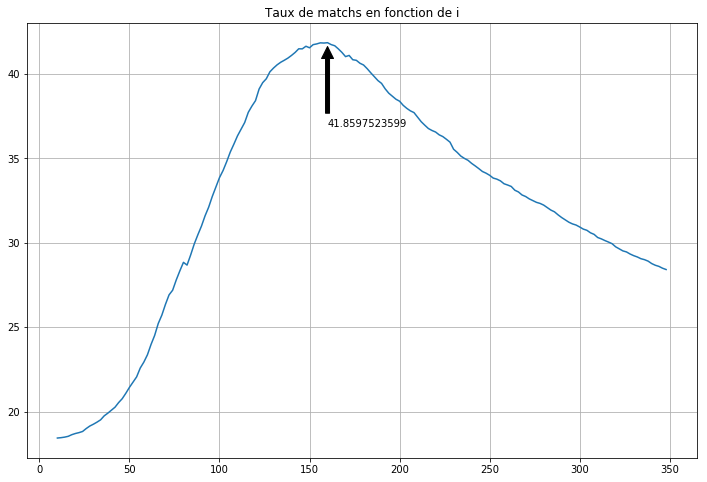

In [35]:
plt.figure(figsize=(12, 8))
plt.title('Taux de matchs en fonction de i')
plt.plot(array_x_plot, results)

# Affichage du max
ymax = max(results)
xpos = results.index(ymax)
xmax = array_x_plot[xpos]
plt.annotate(ymax, xy=(xmax, ymax), xytext=(xmax, ymax-5), arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid('on')
plt.show()

On peut obtenir un taux de 41,19 % de ressemblance entre les deux échelles.

__Créons maintenant un diagramme de type camembert pour voir la répartion entre les bons et les mauvais aliments, suivant les échelles créés ici.__

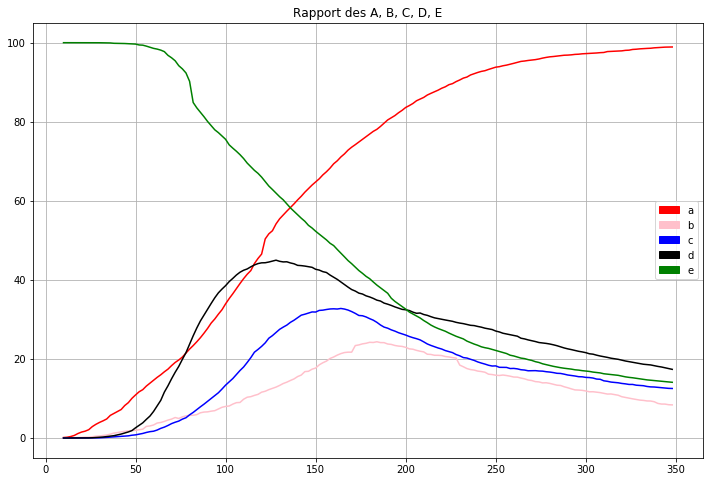

In [36]:
plt.figure(figsize=(12, 8))
plt.grid('on')
plt.title('Rapport des A, B, C, D, E')
plt.plot(array_x_plot, res_a, color='red')
plt.plot(array_x_plot, res_b, color='pink')
plt.plot(array_x_plot, res_c, color='blue')
plt.plot(array_x_plot, res_d, color='black')
plt.plot(array_x_plot, res_e, color='green')

# Création des légendes
p_a = mpatches.Patch(color='red', label='a')
p_b = mpatches.Patch(color='pink', label='b')
p_c = mpatches.Patch(color='blue', label='c')
p_d = mpatches.Patch(color='black', label='d')
p_e = mpatches.Patch(color='green', label='e')
plt.legend(handles=[p_a, p_b, p_c, p_d, p_e])

plt.show()

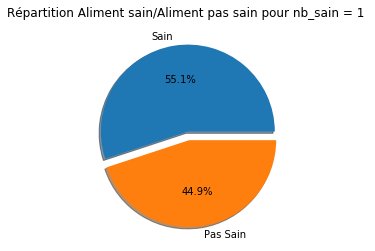

In [37]:
# Création du camembert
# 3 cas possibles
# Dictionnaire pour décider des bons aliments ou pas
dico = {'a': True, 'b': False, 'c' : False, 'd' : False, 'e' : False}
sanite(df, dico, 1)

Si on considère que les aliments 'a' et 'b' sont sains, on obtient les 2/3 des aliments sains.

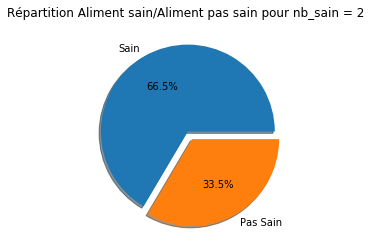

In [38]:
dico = {'a': True, 'b': True, 'c' : False, 'd' : False, 'e' : False}
sanite(df, dico, 2)

Avec uniquement les aliments 'a', on arrive à 56 %

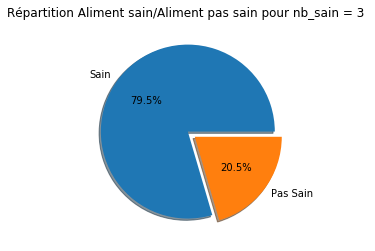

In [39]:
dico = {'a': True, 'b': True, 'c' : True, 'd' : False, 'e' : False}
sanite(df, dico, 3)

Enfin, avec les aliments 'a', 'b' et 'c' on arrive à 79,3 %